In [10]:
import sys
import os
import subprocess
sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from count_pro import count_pro
from out_reader import out_reader

In [11]:
x, y, psi, phi_brush, phi_end_brush = out_reader(range_param = 'Cs',
        min_val = 0.5,
        max_val = 0.5,
        output_dir="2D_pore_in_files",  # Каталог для сохранения файлов
        target_dir="/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",  # Путь для перемещения
        D=5,
        L_pore=20,
        L_wall=5,
        space=5,
        N=30,
        S=100,
        Cs=0.01,
        valence=-0.5,
        chi_surf=-0.55,
        chi_solv=0.5)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.209235e+00 |g| = 2.144204e+00 alpha = 1.000000e+00 
hessian scaling: 0.343156
it =  1  E = 1.123825e+00 |g| = 2.037205e+00 alpha = 1.466374e-01 
it =  2  E = 1.895008e+00 |g| = 1.955076e+00 alpha = 4.563753e-02 
it =  3  E = 2.087473e+00 |g| = 1.896830e+00 alpha = 3.391944e-02 
it =  4  E = 2.303337e+00 |g| = 1.858443e+00 alpha = 2.549812e-02 
it =  5  E = 2.609341e+00 |g| = 1.828574e+00 alpha = 1.832425e-02 
it =  6  E = 2.766473e+00 |g| = 1.804742e+00 alpha = 1.512728e-02 
it =  7  E = 2.908818e+00 |g| = 1.782893e+00 alpha = 1.274528e-02 
it =  8  E = 2.906875e+00 |g| = 1.762880e+00 alpha = 1.193090e-02 
it =  9  E = 2.901395e+00 |g| = 1.743335e+00 alpha = 1.122635e-02 
it =  10  E = 2.834402e+00 |g| = 1.724540e+0

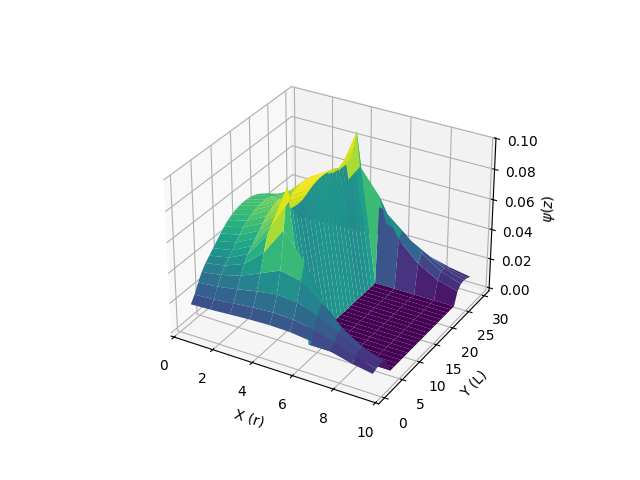

In [12]:
%matplotlib widget

# Создаем сетку для осей X и Y
x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))

# Интерполяция значений Z для каждой точки сетки
z_grid = griddata((x, y), phi_brush, (x_grid, y_grid), method='linear')

# Создаем фигуру для 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим поверхность
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Добавляем метки осей
ax.set_xlabel('X (r)')
ax.set_ylabel('Y (L)')
ax.set_zlabel('$\\psi(z)$')

# Показываем график
plt.show()